# WeatherPy
----

## Generate Cities List

* Found the limits of latitude and and longitude here [Mapbox | Help | latitude and longitude](https://docs.mapbox.com/help/glossary/lat-lon/#:~:text=Latitude%20and%20longitude%20are%20a,180%20to%20180%20for%20longitude.).
* Found the random.uniform method at [NumPy.org | Random Sampling](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)
```
numpy.random.uniform(low=0.0, high=1.0, size=None)
```
* Found documentation and code for citipy here [citipy Release 0.0.5 | Looking up with coordinates](https://libraries.io/pypi/citipy).
```
from citipy import citipy
# Coordinates for nearest city (latitude, longitude)
city = citipy.nearest_city(22.99, 120.21)
# Name of nearest city
city.city_name
# Country of nearest city
city.country_code
```
* Found documentation on date/time stamps on page #67 here: [Python for Data Analysis](https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf)

* Found documentation on formatting time here: [Python.org | Library | Time](https://docs.python.org/3/library/time.html)

#### Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.

In [1]:
# Dependencies
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
from citipy import citipy
import requests

# Import my api keys for Open Weather and Google
from api_keys import weather_api_key

In [2]:
# Create list for latitude/longitude and cities (separate from random versions)
lat_long = []
cities = []

In [3]:
# Create variables for random values
# limits low/high -90/90 for latitude, -180/180 for longitude
# 3000 (the 3rd value) is the amount of items to pull

random_lat = np.random.uniform(low = 19.50139, high = 64.85694, size = 2000)
random_long = np.random.uniform(low = -161.75583, high = -68.01197, size = 2000)
random_lat_long = zip(random_lat, random_long)

# Create a for loop to identify the closest city using citipy        
for lat_long in random_lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    city = city.title()
    
    if city not in cities:
        # Add geocode to cities list
        cities.append(city)

# Check count of actual cities found out of all the random coordinates generated
print(f"Number of cities found: {len(cities)}.")
city

Number of cities found: 614.


'Attawapiskat'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Save api key(s) information
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial" # Thanks to my classmate Dez for warning me about this!

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response data 
# from cities.csv sample in homework instructions, then match up with api specs.
latitude = []
longitude = []
city_name = []
country = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
max_temp = []

#### Open Weather API 
* Data needed from API found at: [Examples of API calls](https://openweathermap.org/current)
>**coord: lon, lat | name | sys:** type, id, message, **country**, sunrise, sunset | **main: temp**, feels_like, temp_min, **temp_max**, pressure, **humidity | clouds: all | dt | wind: speed**, deg

In [5]:
# Create for loop from the list of random cities generated in the first part
# Don't forget a counter and the try exception!

count = 1

print(f"Looking for Open Weather data...")

for city in cities:
    try:
        if(count > 500):
            break
        weather_data = requests.get(f"{query_url}{city}").json()
        
        latitude.append(weather_data["coord"]["lat"])
        longitude.append(weather_data["coord"]["lon"])
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        date.append(weather_data["dt"])
        max_temp.append(weather_data["main"]['temp_max'])
        
        print(f"Found Open Weather data for {count} of {len(cities)}: {city}")
        count = count + 1
        
    except:
        print(f"Open Weather data not found for: {city}")
    
    continue 

Looking for Open Weather data...
Found Open Weather data for 1 of 614: North Bend
Found Open Weather data for 2 of 614: Thompson
Found Open Weather data for 3 of 614: Fortuna
Found Open Weather data for 4 of 614: Shelburne
Open Weather data not found for: Grand Centre
Found Open Weather data for 5 of 614: Creel
Found Open Weather data for 6 of 614: Guerrero Negro
Found Open Weather data for 7 of 614: Cancun
Found Open Weather data for 8 of 614: Baracoa
Found Open Weather data for 9 of 614: Freeport
Found Open Weather data for 10 of 614: Kodiak
Found Open Weather data for 11 of 614: Norman Wells
Found Open Weather data for 12 of 614: Whitehorse
Found Open Weather data for 13 of 614: Saint-Felicien
Found Open Weather data for 14 of 614: Pensacola
Found Open Weather data for 15 of 614: Baker City
Found Open Weather data for 16 of 614: Fort Nelson
Found Open Weather data for 17 of 614: Terrace
Found Open Weather data for 18 of 614: Hannibal
Found Open Weather data for 19 of 614: Nuevo Prog

Found Open Weather data for 164 of 614: Wake Forest
Found Open Weather data for 165 of 614: Madison
Found Open Weather data for 166 of 614: Hornepayne
Found Open Weather data for 167 of 614: Saint George
Found Open Weather data for 168 of 614: Havre
Found Open Weather data for 169 of 614: Nantucket
Found Open Weather data for 170 of 614: Smithers
Found Open Weather data for 171 of 614: Linares
Found Open Weather data for 172 of 614: Columbia
Found Open Weather data for 173 of 614: Callaway
Found Open Weather data for 174 of 614: Mendota
Found Open Weather data for 175 of 614: Chippewa Falls
Found Open Weather data for 176 of 614: Galveston
Found Open Weather data for 177 of 614: Pierre
Found Open Weather data for 178 of 614: Campbell River
Found Open Weather data for 179 of 614: Hopewell
Found Open Weather data for 180 of 614: Nuevitas
Found Open Weather data for 181 of 614: Kamloops
Found Open Weather data for 182 of 614: Big Rapids
Found Open Weather data for 183 of 614: Cortez
Found

Found Open Weather data for 326 of 614: Wahiawa
Found Open Weather data for 327 of 614: Cocorit
Found Open Weather data for 328 of 614: North Augusta
Found Open Weather data for 329 of 614: Rio Cauto
Found Open Weather data for 330 of 614: Santa Rosalia
Found Open Weather data for 331 of 614: Nuevo Laredo
Open Weather data not found for: One Hundred Mile House
Found Open Weather data for 332 of 614: Redmond
Found Open Weather data for 333 of 614: Spearfish
Found Open Weather data for 334 of 614: Waverly
Found Open Weather data for 335 of 614: Houston
Found Open Weather data for 336 of 614: Carson City
Found Open Weather data for 337 of 614: Madison Heights
Found Open Weather data for 338 of 614: Valley
Found Open Weather data for 339 of 614: Robinson
Found Open Weather data for 340 of 614: Santa Maria Del Oro
Found Open Weather data for 341 of 614: Lehi
Found Open Weather data for 342 of 614: Xicotencatl
Found Open Weather data for 343 of 614: Mascota
Found Open Weather data for 344 of

Found Open Weather data for 488 of 614: Olive Branch
Found Open Weather data for 489 of 614: Powell
Found Open Weather data for 490 of 614: Palm Coast
Found Open Weather data for 491 of 614: Seaford
Found Open Weather data for 492 of 614: Macklin
Found Open Weather data for 493 of 614: Key West
Found Open Weather data for 494 of 614: Hammond
Found Open Weather data for 495 of 614: Moorhead
Found Open Weather data for 496 of 614: Lebanon
Found Open Weather data for 497 of 614: Samana
Found Open Weather data for 498 of 614: Virden
Found Open Weather data for 499 of 614: Huron
Found Open Weather data for 500 of 614: Andros Town


# Create a data frame from cities and lat_long

In [6]:
weather_dict = {
    "Latitude":latitude,
    "Longitude":longitude,
    "City":city_name,
    "Country":country,
    "Temperature":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Date":date,
    "Maximum Temperature":max_temp    
}

weather_data = pd.DataFrame(weather_dict)
print(weather_data.count())
weather_data.head()

Latitude               500
Longitude              500
City                   500
Country                500
Temperature            500
Humidity               500
Cloudiness             500
Wind Speed             500
Date                   500
Maximum Temperature    500
dtype: int64


,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date,Maximum Temperature
0,43.41,-124.22,North Bend,US,54.64,100,75,5.82,1602661168,55.99
1,55.74,-97.86,Thompson,CA,30.20,74,40,11.41,1602661168,30.20
2,40.60,-124.16,Fortuna,US,60.53,100,90,3.36,1602661168,62.01
3,44.08,-80.20,Shelburne,CA,45.55,87,1,10.40,1602661168,46.00
4,27.75,-107.63,Creel,MX,53.40,52,98,3.76,1602661168,53.40


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv("../WeatherPy_output/weather_data.csv", index=False)
weather_data = pd.read_csv("../WeatherPy_output/weather_data.csv")
weather_data

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date,Maximum Temperature
0,43.41,-124.22,North Bend,US,54.64,100,75,5.82,1602661168,55.99
1,55.74,-97.86,Thompson,CA,30.20,74,40,11.41,1602661168,30.20
2,40.60,-124.16,Fortuna,US,60.53,100,90,3.36,1602661168,62.01
3,44.08,-80.20,Shelburne,CA,45.55,87,1,10.40,1602661168,46.00
4,27.75,-107.63,Creel,MX,53.40,52,98,3.76,1602661168,53.40
...,...,...,...,...,...,...,...,...,...,...
495,36.21,-86.29,Lebanon,US,46.40,100,75,2.77,1602661229,46.40
496,19.21,-69.34,Samaná,DO,75.56,86,0,1.81,1602661229,75.56
497,39.50,-89.77,Virden,US,51.03,68,100,1.99,1602661229,52.00
498,41.15,-82.55,Huron,US,52.30,68,0,1.01,1602661230,53.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_data[weather_data["Humidity"]>100]
len(hum_100)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

## Latitude vs. Temperature Plot

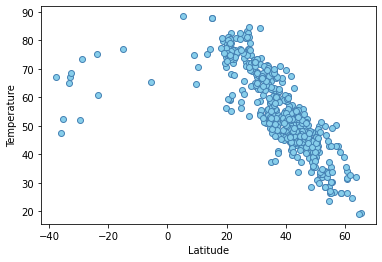

In [9]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, temp, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("../WeatherPy_output/plot01.png")

## Latitude vs. Humidity Plot

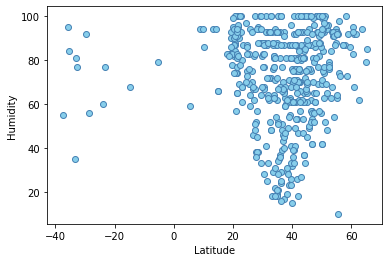

In [10]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, humidity, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("../WeatherPy_output/plot02.png")

## Latitude vs. Cloudiness Plot

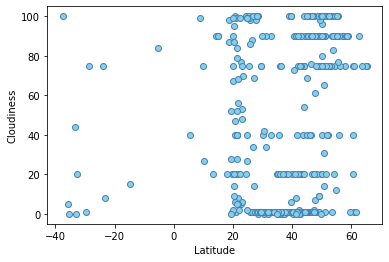

In [11]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, cloudiness, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../WeatherPy_output/plot03.png")

## Latitude vs. Wind Speed Plot

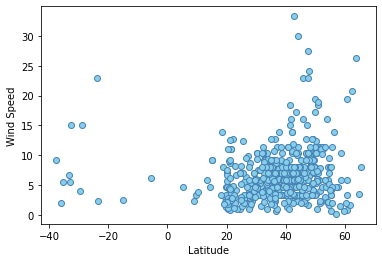

In [12]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, wind_speed, marker="o", facecolors="skyblue", edgecolors="steelblue")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("../WeatherPy_output/plot04.png")

## Linear Regression

#### Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#### After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4692388734851416


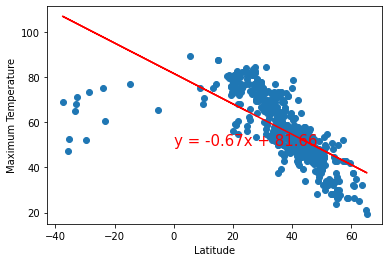

In [13]:
x_values = weather_data['Latitude']
y_values = weather_data['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot05.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4692388734851416


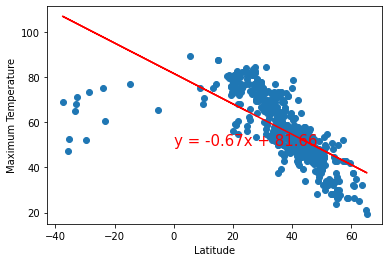

In [14]:
x_values = weather_data['Latitude']
y_values = weather_data['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot06.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010214915314411168


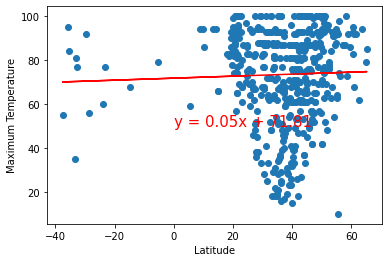

In [15]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot07.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010214915314411168


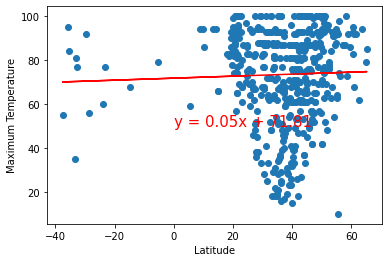

In [16]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot08.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02342294339624006


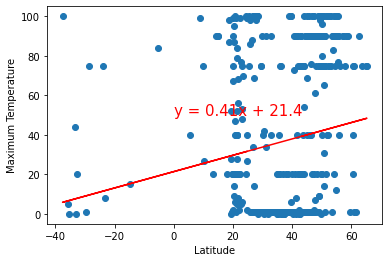

In [17]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot09.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02342294339624006


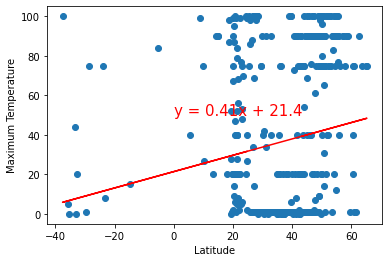

In [18]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot10.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015482752878982488


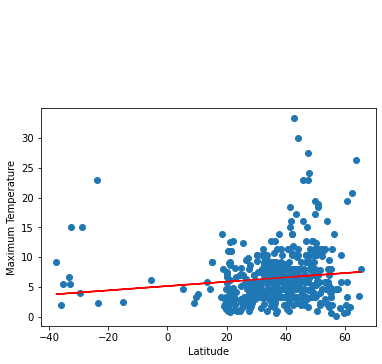

In [19]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot11.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015482752878982488


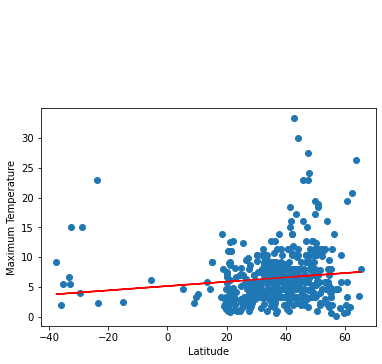

In [20]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("../WeatherPy_output/plot12.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()